In [1129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, \
LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, silhouette_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [1130]:
twenty_stats = pd.read_csv('./datasets/twenty_STATS.csv')
nineteen_stats = pd.read_csv('./datasets/nineteen_STATS.csv')
eighteen_stats =  pd.read_csv('./datasets/eighteen_STATS.csv')
seventeen_stats = pd.read_csv('./datasets/seventeen_STATS.csv')
sixteen_stats = pd.read_csv('./datasets/sixteen_STATS.csv')
fifteen_stats = pd.read_csv('./datasets/fifteen_STATS.csv')
fourteen_stats = pd.read_csv('./datasets/fourteen_STATS.csv')
thirteen_stats = pd.read_csv('./datasets/thirteen_STATS.csv')
twelve_stats = pd.read_csv('./datasets/twelve_STATS.csv')
eleven_stats = pd.read_csv('./datasets/eleven_STATS.csv')


eleven_salary = pd.read_csv('./datasets/eleven_salary.csv')
twelve_salary = pd.read_csv('./datasets/twelve_salary.csv')
thirtheen_salary = pd.read_csv('./datasets/thirtheen_salary.csv')
fourteen_salary = pd.read_csv('./datasets/fourteen_salary.csv')
fifteen_salary = pd.read_csv('./datasets/fifteen_salary.csv')
sixteen_salary = pd.read_csv('./datasets/sixteen_salary.csv')
seventeen_salary = pd.read_csv('./datasets/seventeen_salary.csv')
eighteen_salary = pd.read_csv('./datasets/eighteen_salary.csv')
twenty_salary = pd.read_csv('./datasets/twenty_salary_cond.csv')


twenty_stats_and_sal = pd.read_csv('./datasets/twenty_stats_and_sal.csv')
sixteen_to_twenty_with_sal = pd.read_csv('./datasets/sixteen_to_twenty_with_sal.csv')
seventeen_to_twenty_with_sal = pd.read_csv('./datasets/seventeen_to_twenty_with_sal.csv')
eleven_to_fifteen_with_sal = pd.read_csv('./datasets/eleven_to_fifteen_with_sal.csv')
twelve_to_sixteen_with_sal = pd.read_csv('./datasets/twelve_to_sixteen_with_sal.csv')
thirteen_to_seventeen_with_sal = pd.read_csv('./datasets/thirteen_to_seventeen_with_sal.csv')
fourteen_to_eighteen_with_sal = pd.read_csv('./datasets/fourteen_to_eighteen_with_sal.csv')


In [1131]:
logreg = LogisticRegression(max_iter=100000)
knnc = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bc = BaggingClassifier()
rf = RandomForestClassifier()
svc = SVC()
et = ExtraTreesClassifier()
nb = MultinomialNB()

# First Classification Model(s)

# Sixteen to Twenty with Sal

In [1132]:
sixteen_to_twenty_with_sal.corr()['2019-20'][0:15].sort_values(ascending=False)

FG      0.767685
FGA     0.747993
MP      0.738304
GS      0.697379
2PA     0.684865
2P      0.676427
3PA     0.428419
3P      0.423755
G       0.323772
3P%     0.157425
2P%     0.134902
eFG%    0.133224
FG%     0.128468
Rk     -0.018450
Age    -0.048687
Name: 2019-20, dtype: float64

In [1133]:
u = sixteen_to_twenty_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u
#Want 5 different classifications, will assign them based on the quartiles

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
count,212.000000,212.000000,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02
mean,261.674528,27.090566,62.142453,37.05566,24.973302,4.265000,9.264245,0.460356,1.114151,3.096038,...,1.074434,3.594528,4.664811,2.535472,0.819717,0.510849,1.445943,2.027830,11.599717,1.286460e+07
std,151.696450,3.559448,11.309950,23.08560,6.366613,1.974486,4.185321,0.060940,0.792928,2.073500,...,0.823630,1.753289,2.445914,1.857344,0.376633,0.431623,0.747863,0.543607,5.621677,1.018687e+07
min,1.000000,21.000000,16.200000,0.40000,7.720000,0.720000,2.040000,0.320400,0.000000,0.000000,...,0.160000,1.040000,1.180000,0.340000,0.100000,0.020000,0.260000,0.800000,1.920000,1.962880e+05
20%,115.400000,24.000000,54.240000,12.80000,19.208000,2.540000,5.648000,0.411560,0.340000,1.004000,...,0.440000,2.164000,2.724000,1.064000,0.500000,0.200000,0.860000,1.560000,6.860000,2.564753e+06
40%,205.600000,26.000000,60.880000,27.64000,22.936000,3.388000,7.388000,0.437200,0.880000,2.476000,...,0.660000,2.740000,3.556000,1.540000,0.680000,0.320000,1.100000,1.868000,9.084000,8.000000e+06
50%,258.000000,27.000000,63.400000,33.20000,25.190000,3.820000,8.230000,0.448200,1.060000,3.000000,...,0.780000,3.200000,4.070000,1.880000,0.760000,0.380000,1.250000,2.010000,10.040000,1.070500e+07
60%,302.600000,28.000000,66.800000,45.88000,27.340000,4.400000,9.640000,0.460600,1.300000,3.532000,...,0.980000,3.560000,4.752000,2.400000,0.840000,0.440000,1.480000,2.152000,11.792000,1.315527e+07
80%,419.600000,30.000000,71.960000,62.00000,30.972000,5.872000,13.072000,0.496400,1.720000,4.720000,...,1.640000,4.532000,6.284000,3.908000,1.080000,0.736000,2.000000,2.516000,16.268000,2.314040e+07
max,527.000000,41.000000,79.800000,76.20000,36.640000,9.960000,21.180000,0.673800,4.180000,10.580000,...,4.820000,10.260000,15.080000,9.760000,1.880000,2.460000,4.840000,3.360000,31.780000,4.023176e+07


In [1134]:
u1 = thirteen_to_seventeen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u1

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,233.180412,26.619845,66.086340,38.056701,25.218814,4.114175,9.027577,0.455613,0.819459,2.293041,...,1.101289,3.359149,4.456572,2.435052,0.816108,0.504253,1.462629,2.014820,10.963402,9.642214e+06
std,139.588119,3.516358,11.030749,25.251699,6.904900,1.814532,3.853526,0.051734,0.703791,1.814076,...,0.838901,1.665789,2.374173,1.898676,0.412548,0.470907,0.709042,0.518963,4.962065,6.820829e+06
min,1.000000,19.250000,29.750000,0.000000,9.750000,1.000000,2.325000,0.339500,0.000000,0.000000,...,0.125000,1.025000,1.275000,0.225000,0.150000,0.000000,0.200000,0.625000,2.800000,5.767200e+04
20%,90.600000,23.500000,58.550000,10.500000,18.290000,2.580000,5.565000,0.416650,0.090000,0.315000,...,0.375000,2.050000,2.470000,0.950000,0.475000,0.175000,0.850000,1.575000,6.540000,3.566169e+06
40%,187.400000,25.500000,65.250000,27.800000,23.505000,3.280000,7.415000,0.434750,0.575000,1.750000,...,0.650000,2.630000,3.455000,1.450000,0.650000,0.275000,1.135000,1.925000,8.750000,6.336418e+06
50%,228.500000,26.500000,68.375000,38.875000,25.750000,3.625000,8.187500,0.445125,0.725000,2.087500,...,0.800000,3.000000,3.825000,1.850000,0.750000,0.350000,1.325000,2.012500,9.850000,8.023250e+06
60%,267.800000,27.500000,71.200000,48.600000,27.900000,4.230000,9.615000,0.454350,0.945000,2.735000,...,1.070000,3.275000,4.315000,2.345000,0.850000,0.425000,1.500000,2.125000,11.490000,1.044829e+07
80%,386.000000,29.500000,75.750000,64.600000,32.495000,5.785000,12.610000,0.498700,1.425000,3.860000,...,1.720000,4.520000,6.285000,3.480000,1.100000,0.675000,2.070000,2.385000,15.620000,1.596649e+07
max,476.000000,37.500000,82.000000,81.250000,36.825000,9.700000,20.475000,0.683000,3.875000,8.725000,...,3.725000,8.975000,12.400000,10.150000,2.225000,2.500000,3.675000,3.775000,26.125000,3.096345e+07


In [1135]:
u2 = fourteen_to_eighteen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u2

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,229.217143,26.074286,64.927619,38.200000,25.281333,4.094667,9.058857,0.450552,0.903238,2.504190,...,1.065905,3.391238,4.454476,2.436952,0.833905,0.500000,1.461143,2.020762,11.019238,1.142361e+07
std,133.559831,3.607172,13.050001,26.115179,6.988884,1.879355,4.037398,0.056156,0.721683,1.851711,...,0.851900,1.752061,2.486565,1.902443,0.413215,0.487336,0.735985,0.542963,5.117107,7.995105e+06
min,3.000000,20.000000,16.000000,0.333333,8.733333,0.933333,2.433333,0.262667,0.000000,0.000000,...,0.066667,0.833333,0.933333,0.200000,0.133333,0.000000,0.233333,0.633333,2.633333,5.767200e+04
20%,100.800000,23.000000,55.333333,10.600000,18.626667,2.366667,5.373333,0.411400,0.166667,0.500000,...,0.400000,1.860000,2.420000,0.986667,0.500000,0.166667,0.833333,1.533333,6.386667,3.980780e+06
40%,177.200000,24.600000,64.200000,25.733333,22.680000,3.206667,7.186667,0.430733,0.633333,1.966667,...,0.633333,2.540000,3.286667,1.433333,0.686667,0.253333,1.186667,1.900000,8.400000,7.536000e+06
50%,225.000000,26.000000,68.333333,36.666667,26.066667,3.566667,7.966667,0.438000,0.833333,2.466667,...,0.733333,3.033333,3.800000,1.766667,0.766667,0.333333,1.333333,2.033333,9.966667,1.000000e+07
60%,264.400000,26.000000,71.000000,50.133333,28.380000,4.233333,9.700000,0.449333,1.033333,2.946667,...,0.946667,3.446667,4.273333,2.293333,0.846667,0.400000,1.466667,2.146667,11.453333,1.258252e+07
80%,372.200000,29.000000,76.333333,66.333333,32.293333,5.866667,13.233333,0.482267,1.506667,4.033333,...,1.673333,4.520000,6.293333,3.566667,1.106667,0.766667,2.000000,2.440000,15.906667,1.854850e+07
max,476.000000,38.000000,82.000000,81.000000,38.100000,8.933333,19.900000,0.696333,4.000000,9.066667,...,4.100000,9.966667,14.133333,10.300000,2.166667,2.566667,3.866667,3.833333,25.966667,3.745715e+07


In [1136]:
u['2019-20'].loc['80%']

23140395.000000007

In [1137]:
sixteen_to_twenty_with_sal['sal_classified'] = ""

In [1138]:
for index, i in enumerate(sixteen_to_twenty_with_sal['2019-20']):
    if i < 2564753:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 8000000 and i >= 2564753:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 13155269 and i >= 8000000:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 23140395 and i >= 13155269:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 4
    else:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 5

#Function for the rest of the dataframes will in this format

In [1139]:
# for index, i in enumerate(twelve_to_sixteen_with_sal['salary']):
#     if i < 2564753:
#         twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 1
#     elif i < 8000000 and i >= 2564753:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 2
#     elif i < 13155269 and i >= 8000000:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 3
#     elif i < 23140395 and i >= 13155269:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 4
#     else:
#         twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 5

In [1140]:
# for index, i in enumerate(eleven_to_fifteen_with_sal['salary']):
#     if i < 2564753:
#         eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 1
#     elif i < 8000000 and i >= 2564753:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 2
#     elif i < 13155269 and i >= 8000000:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 3
#     elif i < 23140395 and i >= 13155269:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 4
#     else:
#         eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 5

In [1141]:
for index, i in enumerate(thirteen_to_seventeen_with_sal['salary']):
    if i < 3559779:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 6345674 and i >= 3559779:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 10383156 and i >= 6345674:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 15858628 and i >= 10383156:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 5

In [1142]:
for index, i in enumerate(fourteen_to_eighteen_with_sal['salary']):
    if i < 4112559:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 7512000 and i >= 4112559:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 12513397 and i >= 7512000:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 18512000 and i >= 12513397:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 5

Working primarily with these three years for now, may incorporate others later

In [1143]:
sixteen_to_twenty_with_sal['sal_classified'] = sixteen_to_twenty_with_sal['sal_classified'].astype(int)

In [1144]:
sixteen_to_twenty_with_sal['sal_classified'].value_counts()

2    47
5    43
3    43
4    42
1    37
Name: sal_classified, dtype: int64

In [1145]:
thirteen_to_seventeen_with_sal['sal_classified'].value_counts()

5.0    40
2.0    39
1.0    39
4.0    38
3.0    38
Name: sal_classified, dtype: int64

In [1146]:
fourteen_to_eighteen_with_sal['sal_classified'].value_counts()

1.0    36
4.0    36
5.0    36
2.0    34
3.0    33
Name: sal_classified, dtype: int64

In [1147]:
sixteen_to_twenty_with_sal

,Player,Rk,Season,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20,sal_classified
0,Aaron Gordon,178.0,19-20,PF,22.0,ORL,71.2,61.2,30.36,5.26,...,5.22,6.92,2.64,0.82,0.66,1.48,2.06,13.98,19863636,4
1,Al Horford,228.0,19-20,C,31.0,PHI,71.4,70.2,31.04,5.54,...,5.42,7.00,4.22,0.78,1.22,1.50,1.98,13.52,28000000,5
2,Al-Farouq Aminu,9.0,19-20,PF,27.0,ORL,62.2,51.4,27.40,2.90,...,5.36,6.68,1.40,0.96,0.54,1.18,1.82,8.38,9258000,3
3,Alec Burks,80.0,19-20,SG,26.0,TOT,53.4,9.4,21.16,3.48,...,2.98,3.48,1.72,0.62,0.18,1.14,1.60,10.30,2320044,1
4,Alex Len,293.0,19-20,C,24.0,TOT,71.2,27.2,20.30,3.38,...,4.48,6.60,1.00,0.44,0.96,1.32,2.64,8.92,4160000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Wayne Ellington,145.0,19-20,SG,30.0,NYK,60.8,19.0,22.40,3.10,...,1.96,2.20,1.16,0.66,0.10,0.62,1.24,8.96,7804878,2
208,Wesley Matthews,320.0,19-20,SG,31.0,MIL,70.0,69.6,31.32,3.96,...,2.56,2.94,2.24,0.94,0.20,1.12,2.10,11.66,2564753,2
209,Will Barton,29.0,19-20,SF,27.0,DEN,64.8,31.2,30.18,5.16,...,4.32,5.20,3.32,0.84,0.52,1.62,1.94,14.08,12960000,3
210,Willie Cauley-Stein,94.0,19-20,C,24.0,TOT,69.8,47.6,23.18,3.98,...,4.46,6.20,1.56,0.92,0.84,0.96,2.34,9.40,2177483,1


In [1148]:
features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)

In [1149]:
# X = features
# y = sixteen_to_twenty_with_sal['sal_classified']

In [1150]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [1151]:
# def fit_models_and_score(model):
#     fitting = model.fit(X_train, y_train),
#     scores = print(model.score(X_train, y_train)), print(model.score(X_test, y_test))
    
#     return scores

In [1152]:
def fit_models_and_score(model, feature_list, target):
    X = feature_list
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    fitting = model.fit(X_train, y_train),
    scores = print(f'train score is {(model.score(X_train, y_train))}'), print(f'test score is {model.score(X_test, y_test)}')
    
    return scores

# Scoring models on 16-20 dataset

In [1153]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 0.5608108108108109
test score is 0.5


(None, None)

In [1154]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 0.9797297297297297
test score is 0.9375


(None, None)

In [1155]:
fit_models_and_score(dt, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 1.0
test score is 1.0


(None, None)

In [1156]:
fit_models_and_score(bc, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 1.0
test score is 1.0


(None, None)

In [1157]:
fit_models_and_score(rf, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 1.0
test score is 0.9375


(None, None)

In [1158]:
fit_models_and_score(et, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 1.0
test score is 0.984375


(None, None)

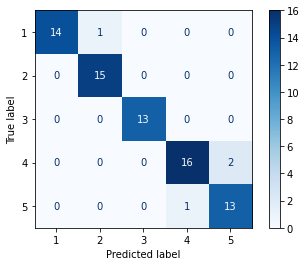

In [1159]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

In [1160]:
lr_grid = [
    {'penalty' : ['l2', 'elasticnet'],
#      'C' : [1.0, 0.1, .05, .01],
     'solver' : ['newton-cg', 'lbfgs', 'saga']
     
        
    }
]

In [1161]:
knnc_grid = [
    {'n_neighbors': range(5, 30, 5),
    'weights': ['uniform', 'distance'],
    'p' : [1,2]}
        
    
]

In [1162]:
logreg_cv = GridSearchCV(logreg,lr_grid,cv=5)

In [1163]:
knnc_cv = GridSearchCV(knnc,knnc_grid,cv=5)

In [1164]:
fit_models_and_score(logreg_cv, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])

train score is 0.9797297297297297
test score is 0.9375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

(None, None)

^Above, same train and test score as when I didn't GS

In [1165]:
fit_models_and_score(knnc_cv, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'])
#kNN model really struggling even when trying to gridsearch for hyperparamter optimization

train score is 0.6013513513513513
test score is 0.4375


(None, None)

Experimenting with fewer features

In [1166]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['FG', 'FGA', 'MP', 'GS', '2PA', '2P']], sixteen_to_twenty_with_sal['sal_classified'])
#Experimenting with new features

train score is 0.5405405405405406
test score is 0.53125


(None, None)

In [1167]:
# fourteen_to_eighteen_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary']

In [1168]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1), fourteen_to_eighteen_with_sal['sal_classified'])

train score is 0.9508196721311475
test score is 0.7735849056603774


(None, None)

In [1169]:
fit_models_and_score(knnc, fourteen_to_eighteen_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1), fourteen_to_eighteen_with_sal['sal_classified'])

train score is 0.5573770491803278
test score is 0.32075471698113206


(None, None)

In [1170]:
fit_models_and_score(bc, fourteen_to_eighteen_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1), fourteen_to_eighteen_with_sal['sal_classified'])

train score is 1.0
test score is 1.0


(None, None)

In [1171]:
fit_models_and_score(et, fourteen_to_eighteen_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1), fourteen_to_eighteen_with_sal['sal_classified'])

train score is 1.0
test score is 0.9433962264150944


(None, None)

# Feature Engineering

In [1172]:
features = ['G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']
X = sixteen_to_twenty_with_sal[features]

In [1173]:
poly = PolynomialFeatures(include_bias=False)

In [1174]:
poly_features = poly.fit_transform(X)

In [1175]:
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names(features))
df_poly

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK^2,BLK TOV,BLK PF,BLK PTS,TOV^2,TOV PF,TOV PTS,PF^2,PF PTS,PTS^2
0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,4.04,...,0.4356,0.9768,1.3596,9.2268,2.1904,3.0488,20.6904,4.2436,28.7988,195.4404
1,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,4.28,...,1.4884,1.8300,2.4156,16.4944,2.2500,2.9700,20.2800,3.9204,26.7696,182.7904
2,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,1.68,...,0.2916,0.6372,0.9828,4.5252,1.3924,2.1476,9.8884,3.3124,15.2516,70.2244
3,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,2.44,...,0.0324,0.2052,0.2880,1.8540,1.2996,1.8240,11.7420,2.5600,16.4800,106.0900
4,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,3.10,...,0.9216,1.2672,2.5344,8.5632,1.7424,3.4848,11.7744,6.9696,23.5488,79.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,0.98,...,0.0100,0.0620,0.1240,0.8960,0.3844,0.7688,5.5552,1.5376,11.1104,80.2816
208,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,1.78,...,0.0400,0.2240,0.4200,2.3320,1.2544,2.3520,13.0592,4.4100,24.4860,135.9556
209,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,3.54,...,0.2704,0.8424,1.0088,7.3216,2.6244,3.1428,22.8096,3.7636,27.3152,198.2464
210,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,3.98,...,0.7056,0.8064,1.9656,7.8960,0.9216,2.2464,9.0240,5.4756,21.9960,88.3600


In [1176]:
twenty_sal = sixteen_to_twenty_with_sal['2019-20']

In [1177]:
df_poly['salary'] = twenty_sal

In [1178]:
u = df_poly.corr()['salary'].sort_values(ascending=False)

In [1179]:
u[0:20].sort_values(ascending=False)
#Idea of some of the features most highly correlated/will work in the model

salary      1.000000
GS PTS      0.804791
MP PTS      0.799904
GS FG       0.798205
MP FG       0.797308
GS FGA      0.794911
MP FGA      0.782256
2P% PTS     0.779474
eFG% PTS    0.779203
PTS         0.777871
FGA 2P%     0.771907
FG% PTS     0.771199
FG          0.767685
FGA eFG%    0.767187
MP^2        0.766666
FG PTS      0.766645
FGA FG%     0.766523
GS FT       0.763413
G PTS       0.763162
FG eFG%     0.763046
Name: salary, dtype: float64

# Scoring models with Polynomial Features 

In [1180]:
my_features = ['GS PTS',  
'MP PTS',      
'GS FG',       
'MP FG',     
'GS FGA',      
'MP FGA',    
'2P% PTS',]

In [1181]:
fit_models_and_score(logreg, df_poly[['GS PTS', 'MP PTS'  ,    
'GS FG',      
'MP FG' ,     
'GS FGA' ,     
'MP FGA'  ,   
'2P% PTS'  ,   
'eFG% PTS'  ,  
'PTS'        , 
'FGA 2P%'     ,
'FG% PTS'     ,
'FG'          ,
'FGA eFG%'    ,
'MP^2'        
# 'FG PTS'      ,
# 'FGA FG%'     ,
# 'GS FT'       ,
# 'G PTS'       ,
# 'FG eFG%'     
                                     ]], sixteen_to_twenty_with_sal['sal_classified'])

train score is 0.5675675675675675
test score is 0.515625


(None, None)

I'll incorporate the new dataframe (and others from past years) to try to raise my accuracy score

# Clustering

In [1182]:
ss = StandardScaler()

In [1183]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal.drop(['sal_classified'],axis=1)
#Dropping what we want to be our target

In [1184]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal.drop(['Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)
#Dropping unnecessary/non-numeric columns

In [1185]:
sixteen_to_twenty_with_sal_sc = ss.fit_transform(sixteen_to_twenty_with_sal)

In [1186]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(sixteen_to_twenty_with_sal_sc)

In [1187]:
salary_model.labels_
#Predictions

array([4, 4, 4, 0, 1, 0, 3, 1, 2, 3, 0, 1, 4, 4, 0, 1, 2, 1, 0, 4, 2, 4,
       0, 0, 2, 0, 4, 0, 2, 0, 3, 1, 0, 0, 0, 1, 2, 0, 2, 4, 4, 3, 2, 0,
       0, 4, 1, 4, 2, 1, 4, 0, 4, 3, 1, 0, 1, 4, 4, 1, 2, 4, 4, 4, 0, 0,
       0, 4, 4, 3, 4, 4, 1, 4, 3, 1, 0, 4, 4, 0, 4, 0, 1, 1, 4, 4, 1, 0,
       0, 2, 1, 0, 0, 4, 1, 4, 0, 2, 1, 0, 4, 1, 3, 4, 4, 2, 3, 0, 0, 4,
       3, 3, 2, 4, 2, 4, 4, 4, 1, 2, 1, 0, 2, 1, 2, 3, 0, 0, 2, 2, 0, 4,
       0, 4, 4, 0, 4, 4, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 4, 0, 1, 4, 3, 3,
       1, 0, 4, 4, 0, 4, 0, 0, 2, 4, 4, 0, 0, 4, 1, 4, 4, 1, 4, 1, 4, 3,
       2, 0, 4, 0, 0, 4, 0, 2, 3, 0, 4, 1, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 4, 1, 2])

In [1188]:
centroids = salary_model.cluster_centers_
centroids

array([[ 0.1304003 , -0.4465121 , -0.93902095, -0.84488358, -0.80758332,
        -0.7117293 , -0.6603034 , -0.08640835, -0.09967235,  0.28974646,
        -0.87493774, -0.84725212, -0.57317049, -0.43501129, -0.69599372,
        -0.7568651 ,  0.20115015, -0.66381654, -0.7825128 , -0.78477353,
        -0.43790174, -0.53615374, -0.62428567, -0.73911376, -0.86852052,
        -0.75611308],
       [-0.1320582 , -0.144368  , -0.44412287, -0.77466223, -0.60898564,
        -0.83549789,  1.20519263, -1.14672531, -1.17997558, -1.18352798,
        -0.1682405 , -0.32073975,  1.04501412,  0.71503942, -0.43112402,
        -0.31759708, -0.99966052,  0.80802738,  0.08254908,  0.33075193,
        -0.69359431, -0.62071784,  0.57358647, -0.55278311,  0.27161851,
        -0.6973587 ],
       [-0.03633511,  0.32756614,  1.07138264,  1.33833545,  1.690311  ,
         1.79133326, -0.13186964,  1.32306476,  1.35585691,  0.45910009,
         1.31313447,  1.4306785 , -0.10989056, -0.06198608,  1.78051414,
       

In [1189]:
score = silhouette_score(sixteen_to_twenty_with_sal_sc, salary_model.labels_)
score

0.20226473717010185

In [1190]:
sixteen_to_twenty_with_sal['cluster'] = salary_model.labels_
sixteen_to_twenty_with_sal

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,22.0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,...,1.68,5.22,6.92,2.64,0.82,0.66,1.48,2.06,13.98,4
1,31.0,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,...,1.58,5.42,7.00,4.22,0.78,1.22,1.50,1.98,13.52,4
2,27.0,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,...,1.32,5.36,6.68,1.40,0.96,0.54,1.18,1.82,8.38,4
3,26.0,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,...,0.48,2.98,3.48,1.72,0.62,0.18,1.14,1.60,10.30,0
4,24.0,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,...,2.14,4.48,6.60,1.00,0.44,0.96,1.32,2.64,8.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,30.0,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,...,0.26,1.96,2.20,1.16,0.66,0.10,0.62,1.24,8.96,0
208,31.0,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,...,0.34,2.56,2.94,2.24,0.94,0.20,1.12,2.10,11.66,4
209,27.0,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,...,0.92,4.32,5.20,3.32,0.84,0.52,1.62,1.94,14.08,4
210,24.0,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,...,1.74,4.46,6.20,1.56,0.92,0.84,0.96,2.34,9.40,1


In [1191]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.9932432432432432
test score is 0.984375


(None, None)

In [1192]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.831081081081081
test score is 0.75


(None, None)

In [1193]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.9932432432432432
test score is 0.984375


(None, None)

Clustering with other datasets

# Searching for ideal number of k for clusters

In [1196]:
for i in range(2,23):
    salary_model = KMeans(n_clusters=i, random_state=0).fit(sixteen_to_twenty_with_sal_sc)
    print(silhouette_score(sixteen_to_twenty_with_sal_sc, salary_model.labels_))

#Highest silhouette scores are with 2 and 3 clusters, but not significantly higher than the one we used where k=5

0.2749013616279595
0.2763159972217445
0.2046602529966292
0.20226473717010185
0.14476250378824998
0.17993114939058472
0.1498822002449758
0.13817940976955703
0.13301930259667832
0.12928553242563276
0.13068637625718071
0.12513995505074074
0.12202690714618188
0.10904883479356187
0.1275436588779501
0.12775077135866825
0.11766367843997398
0.11016313132647415
0.10269156057489424
0.11341517544896292
0.11681378863221319
